In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s4e11_path = kagglehub.competition_download('playground-series-s4e11')

print('Data source import complete.')


100%|██████████| 4.55M/4.55M [00:01<00:00, 3.58MB/s]

Extracting files...


Data source import complete.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the training and testing data
df_train = pd.read_csv(playground_series_s4e11_path + '/train.csv')
df_test = pd.read_csv(playground_series_s4e11_path + '/test.csv')
train_df =  pd.read_csv(playground_series_s4e11_path + '/train.csv')
test_df = pd.read_csv(playground_series_s4e11_path + '/test.csv')
# Dropping 'id' from both train and test
df_train = df_train.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)

# Display the first few rows of the training data
df_train.head(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
duplicate_count = df_train.duplicated().sum()
print(f"Number of duplicate entries: {duplicate_count}")


Number of duplicate entries: 0


In [ ]:
missing_values = df_train.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


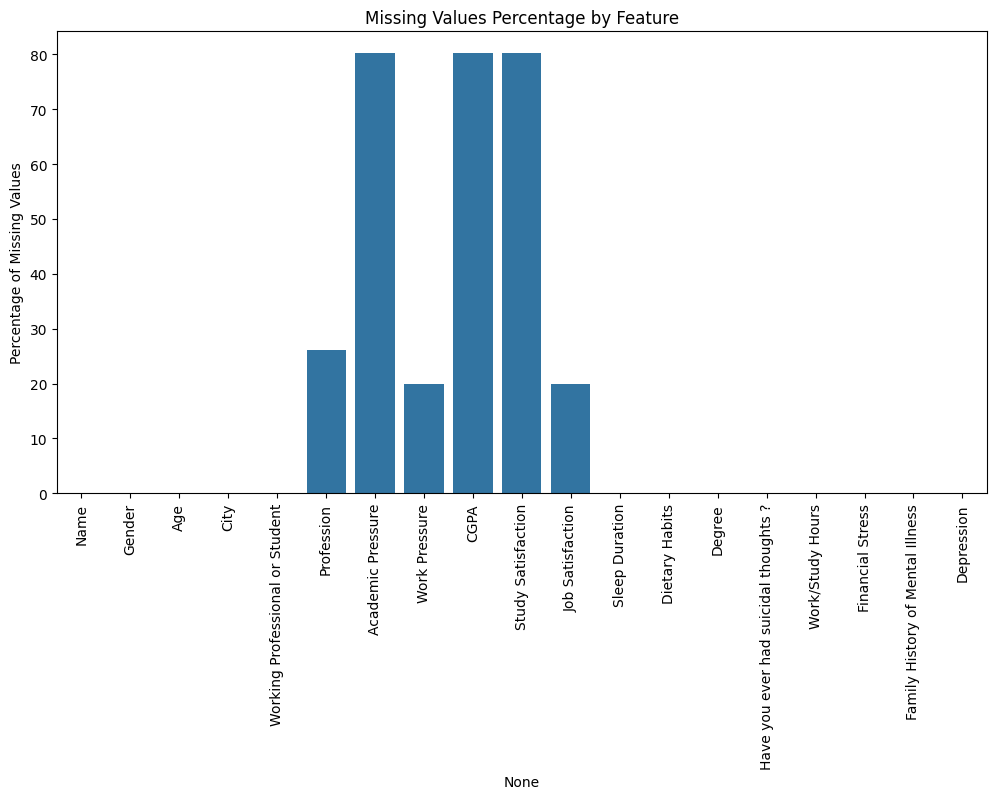

In [ ]:
# Function to plot percentage of missing values
def percent_null(df):
    null_count = df.isnull().sum()
    percent = null_count / len(df) * 100
    plt.figure(figsize=(12,6))
    sns.barplot(x=percent.index, y=percent.values)
    plt.xticks(rotation=90)
    plt.ylabel('Percentage of Missing Values')
    plt.title('Missing Values Percentage by Feature')
    plt.show()

percent_null(df_train)


In [ ]:
# Selecting numerical and categorical columns
num_cols = df_train.select_dtypes(include=np.number).columns
cat_cols = df_train.select_dtypes(exclude=np.number).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')
Categorical Columns: Index(['Name', 'Gender', 'City', 'Working Professional or Student',
       'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')


In [ ]:

# Replace missing CGPA values for Working Professionals with 0
df_train.loc[df_train['Working Professional or Student'] == 'Working Professional', 'CGPA'] = (
    df_train.loc[df_train['Working Professional or Student'] == 'Working Professional', 'CGPA'].fillna(0)
)

# Replace missing CGPA values for Students with the mean CGPA of Students
student_mean = df_train.loc[df_train['Working Professional or Student'] == 'Student', 'CGPA'].mean()
df_train.loc[df_train['Working Professional or Student'] == 'Student', 'CGPA'] = (
    df_train.loc[df_train['Working Professional or Student'] == 'Student', 'CGPA'].fillna(student_mean)
)


In [ ]:
# Creating 'Pressure' and 'Satisfaction' columns
# Ensure that 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', and 'Job Satisfaction' exist
required_columns = ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction']
for col in required_columns:
    if col not in df_train.columns:
        print(f"Column '{col}' not found in the dataset. Please check your data.")

df_train['Pressure'] = df_train[['Academic Pressure', 'Work Pressure']].max(axis=1)

df_train['Satisfaction'] = df_train[['Study Satisfaction', 'Job Satisfaction']].max(axis=1)

df_train['Financial Stress'] = df_train['Financial Stress'].fillna(df_train['Financial Stress'].mean())
df_train['Satisfaction'] = df_train['Satisfaction'].fillna(df_train['Satisfaction'].mean())
df_train['Pressure'] = df_train['Pressure'].fillna(df_train['Pressure'].mean())


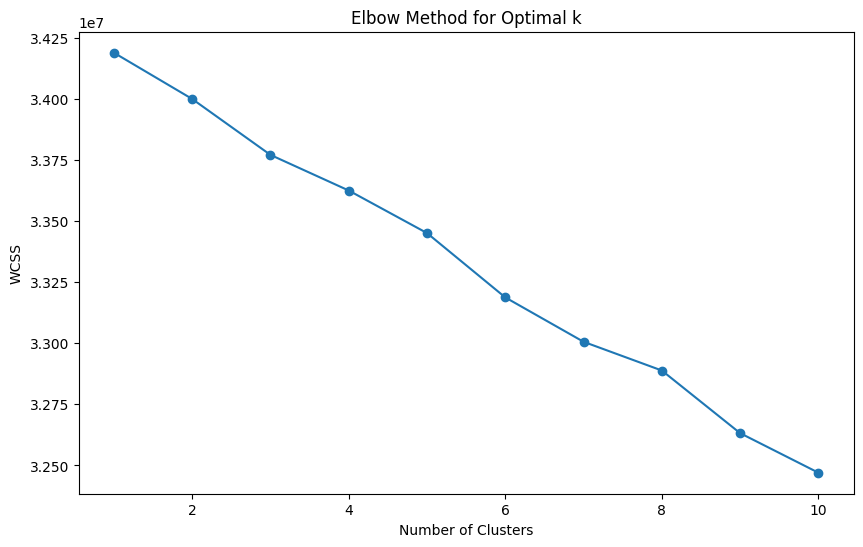

In [ ]:
# Selecting features for clustering
features = df_train[['Age', 'Gender', 'Working Professional or Student', 'Profession', 'Satisfaction', 'Pressure', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness']]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import AgglomerativeClustering, KMeans

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import time

features_encoded = pd.get_dummies(features, drop_first=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


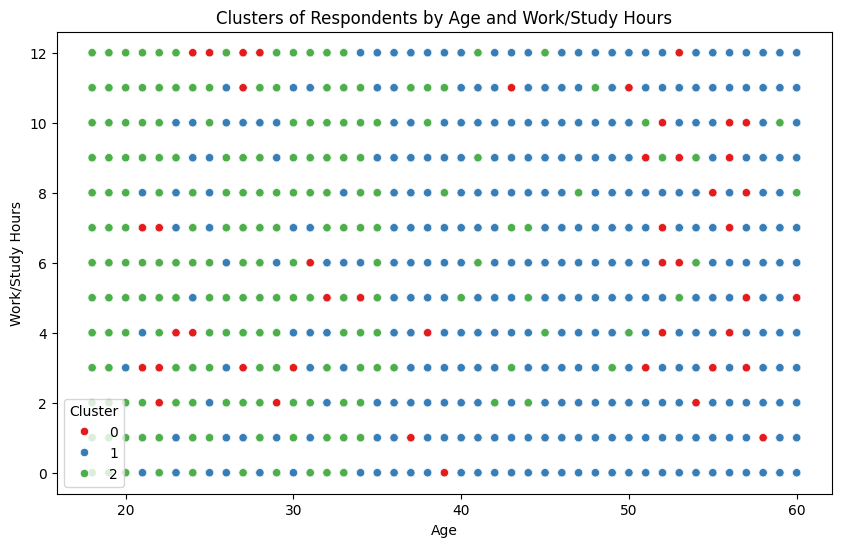

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df_train['Cluster'] = clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Work/Study Hours', hue='Cluster', data=df_train, palette='Set1')
plt.title('Clusters of Respondents by Age and Work/Study Hours')
plt.xlabel('Age')
plt.ylabel('Work/Study Hours')
plt.show()


In [24]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import NMF
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
nmf_features = df_train[['Age', 'CGPA', 'Satisfaction', 'Pressure', 'Work/Study Hours', 'Financial Stress']]

# Handling missing values by filling with 0 (already handled, but redundant safety)
nmf_features = nmf_features.fillna(0)

# Ensure all features are non-negative for NMF
if (nmf_features < 0).any().any():
    raise ValueError("All feature values must be non-negative for NMF.")

# Applying NMF
nmf_model = NMF(n_components=3, init='random', random_state=RANDOM_STATE, max_iter=200)
W = nmf_model.fit_transform(nmf_features)
H = nmf_model.components_

# Creating a DataFrame for the latent features
latent_features = pd.DataFrame(W, columns=['Component 1', 'Component 2', 'Component 3'])

# Adding latent features to the original dataframe
df_train = pd.concat([df_train, latent_features], axis=1)

# Display the first few rows of the latent features
print("Latent Features:")
display(latent_features.head())

# Optional: Evaluate the reconstruction error
reconstructed = np.dot(W, H)
mse = mean_squared_error(nmf_features, reconstructed)
print(f"Reconstruction Mean Squared Error: {mse:.4f}\n")

Latent Features:


,Component 1,Component 2,Component 3
0,5.896817,0.912168,0.009601
1,1.625357,6.117789,0.040081
2,3.589488,1.951079,0.456244
3,0.443492,8.561991,0.014381
4,1.688786,7.618067,0.000000


Reconstruction Mean Squared Error: 1.1731



In [25]:
from sklearn.metrics import mean_squared_error

df_nmf = df_train.copy()

np.random.seed(42)
missing_indices = df_nmf.sample(frac=0.1).index
df_nmf.loc[missing_indices, 'CGPA'] = np.nan

known_cgpa = df_nmf[df_nmf['CGPA'].notnull()]
unknown_cgpa = df_nmf[df_nmf['CGPA'].isnull()]

nmf_model = NMF(n_components=3, init='random', random_state=42, max_iter=200)
W_known = nmf_model.fit_transform(known_cgpa[['Age', 'CGPA', 'Satisfaction', 'Pressure', 'Work/Study Hours', 'Financial Stress']].fillna(0))
H_known = nmf_model.components_

# Predicting CGPA for unknown data
W_unknown = nmf_model.transform(unknown_cgpa[['Age', 'CGPA', 'Satisfaction', 'Pressure', 'Work/Study Hours', 'Financial Stress']].fillna(0))
predicted_ratings = np.dot(W_unknown, H_known)

# Since we only need to predict 'CGPA', we'll extract it from the predicted ratings
# Assuming 'CGPA' is the second column in the H matrix
predicted_cgpa = predicted_ratings[:,1]

# For evaluation, we'll compare with actual CGPA if available (here, we simulated, so using actual values)
# In real scenarios, use a separate validation set
actual_cgpa = df_nmf.loc[missing_indices, 'CGPA'].fillna(df_nmf['CGPA'].mean()).values  # Using mean as placeholder

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_cgpa, predicted_cgpa))
print(f"RMSE for CGPA Prediction: {rmse:.4f}")


RMSE for CGPA Prediction: 1.2386


In [26]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer

# Functions for column operations (for use in pipelines)
def column_ratio(X):
    # Ensure no division by zero
    return X[:, [0]] / (X[:, [1]] + 1e-10)

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # Output name for the transformed column

def column_product(X):
    return X[:, [0]] * X[:, [1]]

def product_name(function_transformer, feature_names_in):
    return ["product"]  # Output name for the transformed column

def column_custom(X):
    # Example custom transformation; adjust as needed
    return np.log((X[:, [0]] * X[:, [1]] * X[:, [2]]) /
                 (X[:, [3]] * X[:, [4]] * X[:, [5]] * (X[:, [6]]**6) + 1e-10))

def custom_name(function_transformer, feature_names_in):
    return ["custom"]  # Output name for the transformed column

# Functions for creating the pipelines
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

def product_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_product, feature_names_out=product_name),
        StandardScaler())

def custom_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_custom, feature_names_out=custom_name),
        StandardScaler())


In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# Create a class to filter out infrequent categories
class FrequentCategoryFilter(BaseEstimator, TransformerMixin):
    def __init__(self, min_count=20):
        self.min_count = min_count
        self.frequent_values_ = {}  # Dictionary to store the frequent categories for each column

    def fit(self, X, y=None):
        # Identify frequent categories for each column
        for col in X.columns:
            value_counts = X[col].value_counts()  # Get value counts for the column
            frequent_values = value_counts[value_counts > self.min_count].index  # Filter values above min_count
            self.frequent_values_[col] = set(frequent_values)  # Store the frequent values for each column
        return self

    def transform(self, X):
        # Create a copy of the data to avoid modifying the original
        X = X.copy()
        for col in X.columns:
            # For each column, replace infrequent values with NaN
            if col in self.frequent_values_:
                X.loc[~X[col].isin(self.frequent_values_[col]), col] = np.nan
        return X

# Create a class to encode the 'Name' column based on frequency of occurrence
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # No fitting required for this encoder

    def transform(self, X):
        # Calculate the frequency of occurrence for each 'Name'
        name_frequency = X['Name'].value_counts()

        # Add a new column with the frequency of each 'Name'
        X['Name frequency'] = X['Name'].map(name_frequency)

        return X

# Create a class to drop specific columns from the DataFrame
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self  # No fitting required for dropping columns

    def transform(self, X):
        # Drop the specified columns
        return X.drop(columns=self.columns_to_drop)

# Create a class to transform the 'Profession' column based on the 'Working Professional or Student' column
class ProfessionTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # No fitting required for this transformation

    def transform(self, X):
        # Apply transformation to the 'Profession' column
        X['Profession'] = X.apply(lambda x: 'Student' if x['Working Professional or Student'] == 'Student' else x['Profession'], axis=1)
        return X

# Create a class to calculate the 'Pressure' and 'Satisfaction' columns
class PressureSatisfactionTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # No fitting required for this calculation

    def transform(self, X):
        # Calculate 'Pressure' as the maximum of 'Academic Pressure' and 'Work Pressure'
        X['Pressure'] = X[['Academic Pressure', 'Work Pressure']].max(axis=1)

        # Calculate 'Satisfaction' as the maximum of 'Study Satisfaction' and 'Job Satisfaction'
        X['Satisfaction'] = X[['Study Satisfaction', 'Job Satisfaction']].max(axis=1)
        return X

# Create a class to add 1 to the 'Work/Study Hours' column
class AddOneToHours(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # No fitting required for this transformation

    def transform(self, X):
        # Add 1 to the 'Work/Study Hours' column
        X['Work/Study Hours'] = X['Work/Study Hours'] + 1
        return X

# Create a class for custom mapping transformations
class CustomMappingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, mappings):
        self.mappings = mappings

    def fit(self, X, y=None):
        return self  # No fitting required for this transformation

    def transform(self, X):
        # Apply the mapping to the relevant columns in the DataFrame
        X = X.copy()
        for col, mapping in self.mappings.items():
            if col in X.columns:
                X[col] = X[col].map(mapping)  # Apply mapping
        return X


In [28]:
from sklearn.compose import ColumnTransformer, make_column_selector

# Define the mappings for categorical variables
DietaryHabitsMapping = {'Unhealthy': 1, 'Moderate': 3, 'Healthy': 5}
SleepDurationMapping = {'Less than 5 hours': 4, '5-6 hours': 5.5, '7-8 hours': 7.5, 'More than 8 hours': 9}
SuicidalThoughtsMapping = {"Yes": 1, "No": 0}
FamilyHistoryMapping = {"Yes": 1, "No": 0}

mappings = {
    'Dietary Habits': DietaryHabitsMapping,
    'Sleep Duration': SleepDurationMapping,
    'Have you ever had suicidal thoughts ?': SuicidalThoughtsMapping,
    'Family History of Mental Illness': FamilyHistoryMapping
}

# Pipeline for categorical data encoding
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values in categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encoding
])

# Default pipeline for numeric data (impute and scale)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                      StandardScaler())

# Full preprocessing pipeline
preprocessing = ColumnTransformer(
    transformers=[
        ("Work/Study Hours Pressure", product_pipeline(), ["Work/Study Hours", "Pressure"]),
        ("Pressure Sleep Duration", ratio_pipeline(), ["Pressure", "Sleep Duration"]),
        ("Work/Study Hours Satisfaction", ratio_pipeline(), ["Work/Study Hours", "Satisfaction"]),
        ("Health Profile", custom_pipeline(), ["Financial Stress", "Pressure", "Work/Study Hours", "Sleep Duration", "Dietary Habits", "Satisfaction", "Age"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),  # One-hot encoding for categorical columns
    ],
    remainder=default_num_pipeline)


In [30]:
try:
    from catboost import CatBoostClassifier
except ModuleNotFoundError:
    !pip install catboost
    from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

# Define the random seed for reproducibility
rs = 42

# Define parameters for each model

# SGDClassifier parameters
sgd_params = {
    'loss': 'log_loss',  # 'log_loss' supports probability estimates
    'random_state': rs,  # For reproducibility, set a fixed seed for random operations
    'alpha': 0.0020684494295802446,  # Regularization strength (L2 regularization)
    'max_iter': 869,  # Maximum number of iterations for optimization
    'tol': 0.07220987722668247  # Tolerance for stopping criteria (when improvement is smaller than this value)
}

# LogisticRegression parameters
logistic_params = {
    'random_state': rs,  # For reproducibility
    'C': 6.274815096277165,  # Regularization strength (inverse of lambda). Smaller values increase regularization.
    'solver': 'lbfgs',  # Solver for optimization ('liblinear', 'lbfgs', 'saga', etc.)
    'max_iter': 413  # Maximum iterations for optimization. Higher values ensure convergence, but increase computation time.
}

# RandomForestClassifier parameters
rf_params = {
    'n_estimators': 100,  # Number of trees in the forest
    'min_samples_split': 5,  # The minimum number of samples required to split an internal node
    'min_samples_leaf': 4,  # The minimum number of samples required at a leaf node
    'max_features': 'sqrt',  # The number of features to consider when looking for the best split
    'max_depth': 30,  # The maximum depth of each tree, limiting the tree depth helps reduce overfitting
    'bootstrap': False,  # Whether bootstrap samples are used when building trees (False means no sampling)
    'random_state': rs  # For reproducibility
}

# MLPClassifier parameters
mlp_params = {
    'hidden_layer_sizes': (64, 32),  # Two hidden layers: 64 units in the first, 32 in the second
    'activation': 'relu',            # ReLU activation function for hidden layers
    'solver': 'adam',                # Adam optimizer
    'learning_rate': 'adaptive',     # Adaptive learning rate
    'learning_rate_init': 0.001,     # Initial learning rate for optimization
    'max_iter': 300,                 # Maximum number of iterations for training
    'alpha': 0.0001,                 # L2 regularization strength
    'batch_size': 32,                # Minibatch size (auto adjusts)
    'early_stopping': True,          # Stop early if validation score stops improving
    'random_state': rs               # For reproducibility
}

# CatBoost parameters
catboost_params = {
    'iterations': 145,  # Number of boosting iterations (trees) to train
    'depth': 7,  # Maximum depth of trees
    'learning_rate': 0.29930179265937246,  # Step size for each boosting round
    'l2_leaf_reg': 1.242352421942431,  # L2 regularization term for leaf weights (prevents overfitting)
    'random_strength': 8.325681754379957,  # Controls the randomness in the model (higher value = less randomness)
    'bagging_temperature': 0.7869848919618048,  # Controls randomness in the sampling process
    'border_count': 139,  # Number of bins used for discretizing numeric features
    'verbose': 0,  # Silent mode
    'random_state': rs,  # For reproducibility
}

# Initialize models using the parameters stored in the dictionaries
sgd_classifier = SGDClassifier(**sgd_params)
logistic_classifier = LogisticRegression(**logistic_params)
rf_classifier = RandomForestClassifier(**rf_params)
mlp_classifier = MLPClassifier(**mlp_params)
catboost_classifier = CatBoostClassifier(**catboost_params)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [32]:
pipeline = Pipeline(
    steps=[
        ('filter_frequent', FrequentCategoryFilter(min_count=20)),  # Filter infrequent categories
        ('name_stats', FrequencyEncoder()),  # Add name frequency as a feature
        ('pressure_satisfaction', PressureSatisfactionTransformer()),  # Calculate Pressure and Satisfaction
        ('transform_profession', ProfessionTransformer()),  # Transform Profession column
        ('add_one_to_work_study_hours', AddOneToHours()),  # Add 1 to Work/Study Hours
        ('custom_mapping', CustomMappingTransformer(mappings=mappings)),  # Apply custom mappings
        ('preprocessing', preprocessing),  # Apply the preprocessing pipeline
    ]
)

# -----------------------------
# 7. Defining the Target Variable and Feature Set
# -----------------------------

# Define the target variable
y = df_train['Depression']

In [33]:
# Define the feature set by dropping the target variable
X = df_train.drop('Depression', axis=1)

# Display the features and target
print("Features (X):")
display(X.head())

print("\nTarget (y):")
display(y.head())

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Verify the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}\n")


Features (X):


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,...,Family History of Mental Illness,Pressure,Satisfaction,Cluster,Component 1,Component 2,Component 3,Component 1,Component 2,Component 3
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,0.00,NaN,...,No,5.0,2.0,1,5.896817,0.912168,0.009601,5.896817,0.912168,0.009601
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,0.00,NaN,...,No,4.0,3.0,1,1.625357,6.117789,0.040081,1.625357,6.117789,0.040081
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,...,No,5.0,2.0,2,3.589488,1.951079,0.456244,3.589488,1.951079,0.456244
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,0.00,NaN,...,Yes,5.0,1.0,1,0.443492,8.561991,0.014381,0.443492,8.561991,0.014381
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,0.00,NaN,...,Yes,1.0,1.0,0,1.688786,7.618067,0.000000,1.688786,7.618067,0.000000



Target (y):


,Depression
0,0
1,1
2,1
3,1
4,0


X_train shape: (112560, 27)
X_val shape: (28140, 27)
y_train shape: (112560,)
y_val shape: (28140,)



In [34]:
sgd_params = {
    'loss': 'log_loss',  # 'log_loss' supports probability estimates
    'random_state': RANDOM_STATE,
    'alpha': 0.0020684494295802446,
    'max_iter': 869,
    'tol': 0.07220987722668247
}

# LogisticRegression parameters
logistic_params = {
    'random_state': RANDOM_STATE,
    'C': 6.274815096277165,
    'solver': 'lbfgs',
    'max_iter': 413
}

# RandomForestClassifier parameters
rf_params = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 30,
    'bootstrap': False,
    'random_state': RANDOM_STATE
}

# MLPClassifier parameters
mlp_params = {
    'hidden_layer_sizes': (64, 32),
    'activation': 'relu',
    'solver': 'adam',
    'learning_rate': 'adaptive',
    'learning_rate_init': 0.001,
    'max_iter': 300,
    'alpha': 0.0001,
    'batch_size': 32,
    'early_stopping': True,
    'random_state': RANDOM_STATE
}

# CatBoost parameters
catboost_params = {
    'iterations': 145,
    'depth': 7,
    'learning_rate': 0.29930179265937246,
    'l2_leaf_reg': 1.242352421942431,
    'random_strength': 8.325681754379957,
    'bagging_temperature': 0.7869848919618048,
    'border_count': 139,
    'verbose': 0,
    'random_state': RANDOM_STATE,
}

# Initialize models using the parameters stored in the dictionaries
sgd_classifier = SGDClassifier(**sgd_params)
logistic_classifier = LogisticRegression(**logistic_params)
rf_classifier = RandomForestClassifier(**rf_params)
mlp_classifier = MLPClassifier(**mlp_params)
catboost_classifier = CatBoostClassifier(**catboost_params)

In [35]:
print("Applying preprocessing pipeline to training data...")
X_train_transformed = pipeline.fit_transform(X_train)
print("Preprocessing completed for training data.\n")

# Apply the same transformations to the validation data
print("Applying preprocessing pipeline to validation data...")
X_val_transformed = pipeline.transform(X_val)  # Use transform, not fit_transform, on validation data
print("Preprocessing completed for validation data.\n")

# Convert the transformed data into DataFrames for better readability (optional)
df_X_train_transformed = pd.DataFrame(
    X_train_transformed,
    columns=preprocessing.get_feature_names_out(),
    index=X_train.index
)

df_X_val_transformed = pd.DataFrame(
    X_val_transformed,
    columns=preprocessing.get_feature_names_out(),
    index=X_val.index
)

# -----------------------------
# 11. Training and Evaluating Classifiers
# -----------------------------

# List of classifiers to loop through
classifiers = [
    ('SGD', sgd_classifier),
    ('LogisticRegression', logistic_classifier),
    ('RandomForest', rf_classifier),
    ('MLP', mlp_classifier),
    ('CatBoost', catboost_classifier)
]

# Initialize an empty dictionary to store accuracy results
accuracy_results = {}

# Loop through each classifier, fit it to the training data, and evaluate on validation data
for name, classifier in classifiers:
    print(f"Training {name}...")
    start_time = time.time()
    classifier.fit(df_X_train_transformed, y_train)
    end_time = time.time()
    print(f"{name} fitting time: {end_time - start_time:.4f} seconds")

    # Make predictions on validation set
    y_pred = classifier.predict(df_X_val_transformed)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}\n")

# -----------------------------
# 12. Displaying Classifier Accuracies
# -----------------------------

print("Classifier Accuracies:")
for name, accuracy in accuracy_results.items():
    print(f"{name}: {accuracy:.4f}")

# -----------------------------
# 13. Selecting the Best Classifier
# -----------------------------

# Identify the classifier with the highest accuracy
best_classifier_name = max(accuracy_results, key=accuracy_results.get)
best_accuracy = accuracy_results[best_classifier_name]
print(f"\nBest Classifier: {best_classifier_name} with Accuracy: {best_accuracy:.4f}\n")

# -----------------------------
# 14. Retraining the Best Classifier and Generating Confusion Matrix
# -----------------------------

# Retrain the best classifier on the entire training data
best_classifier = [clf for name, clf in classifiers if name == best_classifier_name][0]
best_pipeline = Pipeline(steps=[
    ('filter_frequent', FrequentCategoryFilter(min_count=20)),
    ('name_stats', FrequencyEncoder()),
    ('pressure_satisfaction', PressureSatisfactionTransformer()),
    ('transform_profession', ProfessionTransformer()),
    ('add_one_to_work_study_hours', AddOneToHours()),
    ('custom_mapping', CustomMappingTransformer(mappings=mappings)),
    ('preprocessing', preprocessing),
    ('classifier', best_classifier)
])

# Fit the pipeline
print(f"Retraining the best classifier: {best_classifier_name} on the entire training data...")
start_time = time.time()
best_pipeline.fit(X, y)
end_time = time.time()
print(f"Retraining completed in {end_time - start_time:.4f} seconds.\n")

# Predict on validation set
y_pred_best = best_pipeline.predict(X_val)

# Generate confusion matrix
conf_mat = confusion_matrix(y_val, y_pred_best)
conf_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=best_pipeline.named_steps['classifier'].classes_)

# Plot confusion matrix
conf_display.plot(cmap='Blues')
plt.title(f'Confusion Matrix for {best_classifier_name} (Accuracy: {best_accuracy:.4f})')
plt.show()

# -----------------------------
# 15. Making Predictions on Test Data and Preparing Submission
# -----------------------------

# Apply the preprocessing pipeline to the test data
print("Applying preprocessing pipeline to test data...")
X_test_transformed = pipeline.transform(df_test)
print("Preprocessing completed for test data.\n")

# Make predictions on the test data using the best classifier
y_test_pred = best_pipeline.predict(df_test)

# Prepare the submission DataFrame
# Reload the original test data to retrieve 'id' if it was dropped
df_test_original = pd.read_csv(data_path + 'test.csv')
if 'id' in df_test_original.columns:
    submission = pd.DataFrame({
        'id': df_test_original['id'],
        'Depression': y_test_pred
    })
else:
    # If 'id' was not present, generate a sequential id starting from 140700
    submission = pd.DataFrame({
        'id': np.arange(140700, 140700 + len(y_test_pred)),
        'Depression': y_test_pred
    })

# Save the submission file
submission_path = data_path + 'submission.csv'
submission.to_csv(submission_path, index=False)
print(f"Submission file saved to {submission_path}.\n")

# Display the first few rows of the submission file
print("Sample of the submission file:")
display(submission.head())

Applying preprocessing pipeline to training data...


ValueError: Grouper for 'Component 1' not 1-dimensional

In [ ]:
# Assuming all previous steps have been executed and the pipeline is trained
# Sample data for sample_submission.csv
sample_submission_data = {
    'id': [1, 2, 3, 4, 5],
    'prediction': [0, 0, 0, 0, 0]  # Placeholder values for predictions
}

# Creating DataFrame
sample_submission = pd.DataFrame(sample_submission_data)

sample_submission.to_csv(playground_series_s4e11_path + 'sample_submission.csv', index=False)
sample_submission = pd.read_csv(playground_series_s4e11_path +'sample_submission.csv')


In [ ]:
# Display the first few rows of the training data
print("Training Data:")
display(df_train.head())

# Display the first few rows of the test data
print("\nTest Data:")
display(df_test.head())

# Display the first few rows of the sample submission
print("\nSample Submission:")
display(sample_submission.head())

Training Data:


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0



Test Data:


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No



Sample Submission:


,id,prediction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
# Dropping 'id' from both train and test
df_train = df_train.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)

# Display the first few rows of the updated training data
print("Updated Training Data (after dropping 'id'):")
display(df_train.head())


Updated Training Data (after dropping 'id'):


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
# Define the target variable
y = df_train['Depression']

# Define the feature set by dropping the target variable
X = df_train.drop('Depression', axis=1)

# Display the features and target
print("Features (X):")
display(X.head())

print("\nTarget (y):")
display(y.head())


Features (X):


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes



Target (y):


,Depression
0,0
1,1
2,1
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")


X_train shape: (112560, 18)
X_val shape: (28140, 18)
y_train shape: (112560,)
y_val shape: (28140,)


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
import numpy as np

# Function for ratio calculation
def column_ratio(X):
    # Prevent division by zero
    return X[:, [0]] / (X[:, [1]] + 1e-10)

# Function for product calculation
def column_product(X):
    return X[:, [0]] * X[:, [1]]

# Function for custom calculation (example)
def column_custom(X):
    # Example: log transformation of a complex formula
    return np.log((X[:, 0] * X[:, 1] * X[:, 2]) / (X[:, 3] * X[:, 4] * X[:, 5] * (X[:, 6]**6) + 1e-10))

# Define pipeline steps for ratio, product, and custom features
ratio_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(column_ratio, validate=False),
    StandardScaler()
)

product_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(column_product, validate=False),
    StandardScaler()
)

custom_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(column_custom, validate=False),
    StandardScaler()
)

# Custom Transformer Classes
class FrequentCategoryFilter(BaseEstimator, TransformerMixin):
    def __init__(self, min_count=20):
        self.min_count = min_count
        self.frequent_values_ = {}

    def fit(self, X, y=None):
        for col in X.columns:
            value_counts = X[col].value_counts()
            self.frequent_values_[col] = set(value_counts[value_counts > self.min_count].index)
        return self

    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            if col in self.frequent_values_:
                X[col] = X[col].apply(lambda x: x if x in self.frequent_values_[col] else np.nan)
        return X

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.frequency_ = X['Name'].value_counts()
        return self

    def transform(self, X):
        X = X.copy()
        X['Name frequency'] = X['Name'].map(self.frequency_)
        return X

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns_to_drop)

class ProfessionTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['Profession'] = X.apply(lambda x: 'Student' if x['Working Professional or Student'] == 'Student' else x['Profession'], axis=1)
        return X

class PressureSatisfactionTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['Pressure'] = X[['Academic Pressure', 'Work Pressure']].max(axis=1)
        X['Satisfaction'] = X[['Study Satisfaction', 'Job Satisfaction']].max(axis=1)
        return X

class AddOneToHours(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['Work/Study Hours'] = X['Work/Study Hours'] + 1
        return X

class CustomMappingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, mappings):
        self.mappings = mappings

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, mapping in self.mappings.items():
            if col in X.columns:
                X[col] = X[col].map(mapping)
        return X


In [ ]:
# Define the mappings for categorical variables
DietaryHabitsMapping = {'Unhealthy': 1, 'Moderate': 3, 'Healthy': 5}
SleepDurationMapping = {'Less than 5 hours': 4, '5-6 hours': 5.5, '7-8 hours': 7.5, 'More than 8 hours': 9}
SuicidalThoughtsMapping = {"Yes": 1, "No": 0}
FamilyHistoryMapping = {"Yes": 1, "No": 0}

mappings = {
    'Dietary Habits': DietaryHabitsMapping,
    'Sleep Duration': SleepDurationMapping,
    'Have you ever had suicidal thoughts ?': SuicidalThoughtsMapping,
    'Family History of Mental Illness': FamilyHistoryMapping
}

# Pipeline for categorical data encoding with updated parameter
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values in categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encoding
])

# Default pipeline for numeric data (impute and scale)
default_num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

# Full preprocessing pipeline
preprocessing = ColumnTransformer(
    transformers=[
        ("Work/Study Hours Pressure", product_pipeline, ["Work/Study Hours", "Pressure"]),
        ("Pressure Sleep Duration", ratio_pipeline, ["Pressure", "Sleep Duration"]),
        ("Work/Study Hours Satisfaction", ratio_pipeline, ["Work/Study Hours", "Satisfaction"]),
        ("Health Profile", custom_pipeline, ["Financial Stress", "Pressure", "Work/Study Hours", "Sleep Duration", "Dietary Habits", "Satisfaction", "Age"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object))  # One-hot encoding for categorical columns
    ],
    remainder=default_num_pipeline  # Default processing for the rest of the numerical columns
)


In [ ]:
# Combine all preprocessing steps into the final pipeline
pipeline = Pipeline(
    steps=[
        ('filter_frequent', FrequentCategoryFilter(min_count=20)),  # Filter infrequent categories
        ('name_stats', FrequencyEncoder()),  # Add name frequency as a feature
        ('pressure_satisfaction', PressureSatisfactionTransformer()),  # Calculate Pressure and Satisfaction
        ('transform_profession', ProfessionTransformer()),  # Transform Profession column
        # ('drop_columns', DropColumns(columns_to_drop=["id"])),  # Remove this step if 'id' is already dropped
        ('add_one_to_work/study_hours', AddOneToHours()),  # Add 1 to Work/Study Hours
        ('custom_mapping', CustomMappingTransformer(mappings=mappings)),  # Apply custom mappings
        ('preprocessing', preprocessing),  # Apply the preprocessing pipeline
    ]
)


In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

# Define the random seed for reproducibility
rs = 42

# Define parameters for each model

# SGDClassifier parameters
sgd_params = {
    'loss': 'log_loss',  # 'log_loss' supports probability estimates
    'random_state': rs,
    'alpha': 0.0020684494295802446,
    'max_iter': 869,
    'tol': 0.07220987722668247
}

# LogisticRegression parameters
logistic_params = {
    'random_state': rs,
    'C': 6.274815096277165,
    'solver': 'lbfgs',
    'max_iter': 413
}

# RandomForestClassifier parameters
rf_params = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 30,
    'bootstrap': False,
    'random_state': rs
}

# MLPClassifier parameters
mlp_params = {
    'hidden_layer_sizes': (64, 32),
    'activation': 'relu',
    'solver': 'adam',
    'learning_rate': 'adaptive',
    'learning_rate_init': 0.001,
    'max_iter': 300,
    'alpha': 0.0001,
    'batch_size': 32,
    'early_stopping': True,
    'random_state': rs
}

# CatBoostClassifier parameters
catboost_params = {
    'iterations': 145,
    'depth': 7,
    'learning_rate': 0.29930179265937246,
    'l2_leaf_reg': 1.242352421942431,
    'random_strength': 8.325681754379957,
    'bagging_temperature': 0.7869848919618048,
    'border_count': 139,
    'verbose': 0,
    'random_state': rs,
}

# Initialize models using the parameters stored in the dictionaries
sgd_classifier = SGDClassifier(**sgd_params)
logistic_classifier = LogisticRegression(**logistic_params)
rf_classifier = RandomForestClassifier(**rf_params)
mlp_classifier = MLPClassifier(**mlp_params)
catboost_classifier = CatBoostClassifier(**catboost_params)
